# Watch Me Code 4: More Matplotlib

- Data Analysis of Syracuse Weather with Plotting


In [4]:
%matplotlib inline 
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0) # larger figure size
import pandas as pd
import numpy as np
from pandas import DataFrame, Series

In [5]:
weather = pd.read_csv("https://raw.githubusercontent.com/mafudge/datasets/master/weather/syracuse-ny.csv")

In [6]:
weather.head()

,EST,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,MeanDew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityMiles,Mean VisibilityMiles,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,Max Gust SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
0,1997-1-1,27,12.0,-2,22,4,-8,92,74,59,...,10,9,1,14,5,NaN,0.05,6,Snow,89
1,1997-1-2,34,28.0,23,33,29,21,100,96,88,...,9,2,0,8,4,NaN,0.08,8,Fog-Rain-Snow,82
2,1997-1-3,44,40.0,36,44,38,34,100,96,89,...,10,4,0,15,6,NaN,0.09,8,Fog-Rain,273
3,1997-1-4,48,40.0,34,44,36,33,96,90,83,...,10,10,8,13,4,NaN,0.00,8,Rain,80
4,1997-1-5,55,46.0,37,50,43,29,89,81,73,...,10,10,10,21,11,30.0,0.13,8,Rain,199


In [7]:
weather['Events'].unique()

array(['Snow', 'Fog-Rain-Snow', 'Fog-Rain', 'Rain', nan, 'Rain-Snow',
       'Fog-Snow', 'Rain-Thunderstorm', 'Fog-Rain-Thunderstorm',
       'Thunderstorm', 'Fog', 'Fog-Rain-Snow-Thunderstorm',
       'Rain-Snow-Thunderstorm', 'Fog-Snow-Thunderstorm',
       'Rain-Hail-Thunderstorm'], dtype=object)

Let's get just the thunderstorms!

In [10]:
thunder = weather[ weather['Events'].str.find('Thunderstorm') >=0 ]
thunder.head()

,EST,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,MeanDew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityMiles,Mean VisibilityMiles,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,Max Gust SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
128,1997-5-9,64,56.0,48,52,46,38,93,78,55,...,10,9,3,22,9,29.0,0.16,7,Rain-Thunderstorm,246
138,1997-5-19,63,58.0,53,63,58,42,100,93,66,...,10,4,1,13,6,NaN,0.92,8,Rain-Thunderstorm,280
163,1997-6-13,77,68.0,60,65,61,57,93,78,64,...,10,6,3,13,6,NaN,0.05,7,Rain-Thunderstorm,240
170,1997-6-20,78,66.0,57,70,63,56,97,87,71,...,10,6,3,8,5,NaN,0.04,7,Rain-Thunderstorm,92
176,1997-6-26,79,74.0,64,72,66,53,100,79,45,...,10,7,2,16,8,NaN,0.15,6,Rain-Thunderstorm,275


The percentage of days it thunders in Syracuse, historically

In [9]:
thunder.EST.count() / weather.EST.count()

0.067640613586559539

In [8]:
weather.columns

Index(['EST', 'Max TemperatureF', 'Mean TemperatureF', 'Min TemperatureF',
       'Max Dew PointF', 'MeanDew PointF', 'Min DewpointF', 'Max Humidity',
       'Mean Humidity', 'Min Humidity', 'Max Sea Level PressureIn',
       'Mean Sea Level PressureIn', 'Min Sea Level PressureIn',
       'Max VisibilityMiles', 'Mean VisibilityMiles', 'Min VisibilityMiles',
       'Max Wind SpeedMPH', 'Mean Wind SpeedMPH', 'Max Gust SpeedMPH',
       'PrecipitationIn', 'CloudCover', 'Events', 'WindDirDegrees'],
      dtype='object')

What is the relationship between Temperature and Dewpoint?

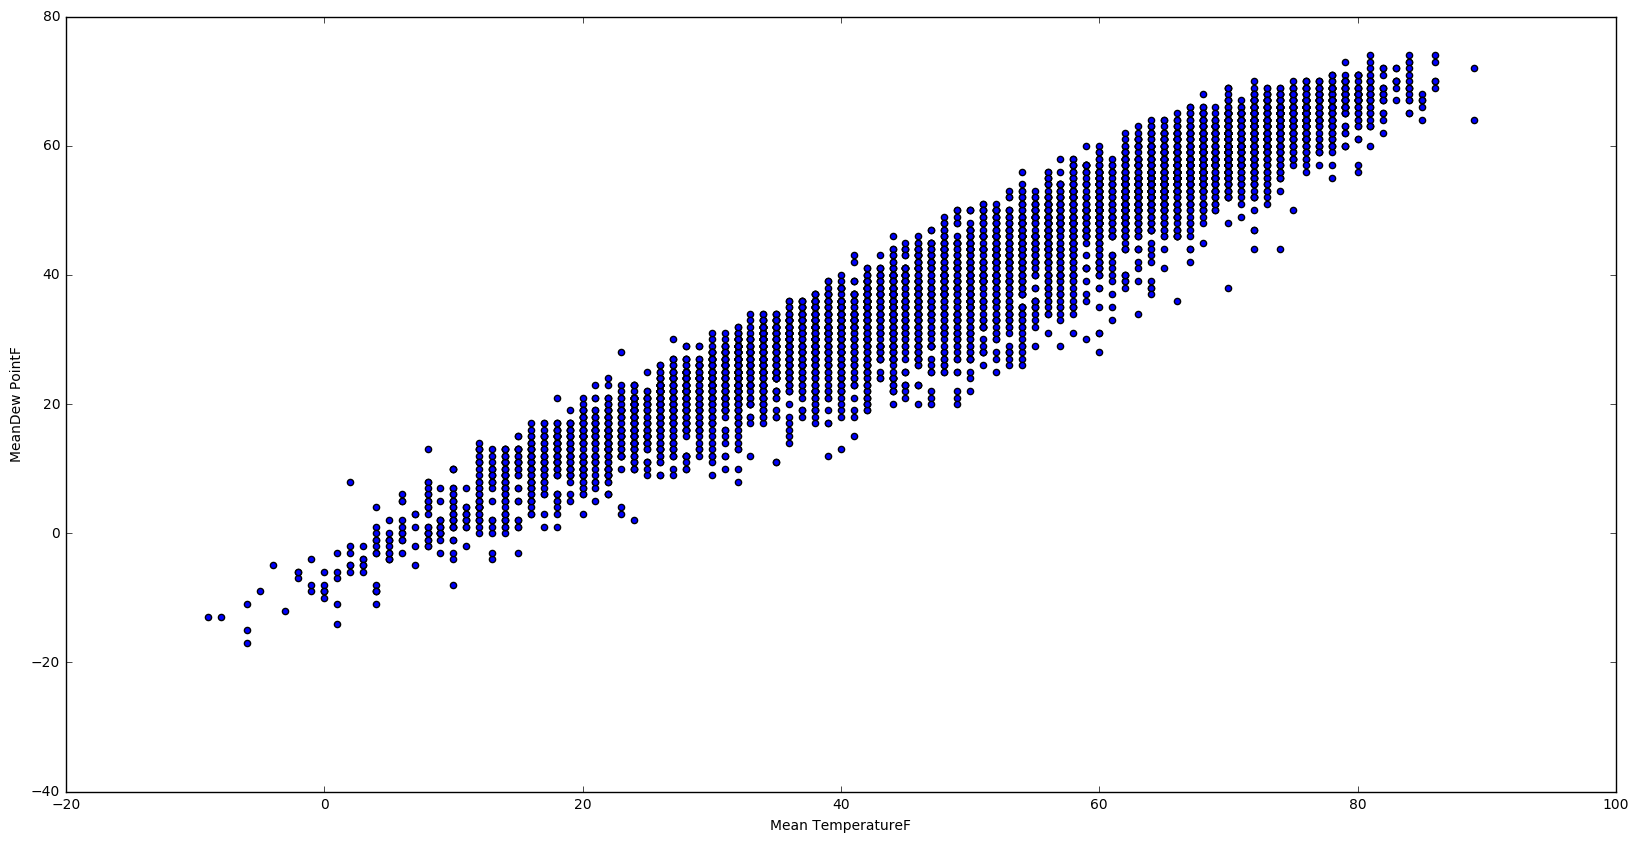

In [11]:
weather.plot.scatter( x = 'Mean TemperatureF', y = 'MeanDew PointF')

INSIGHT: Positive correlation between tem and dewpoint. Every meteroloogist knows this. ;-)

What is the relationship between cloud cover and visibility?

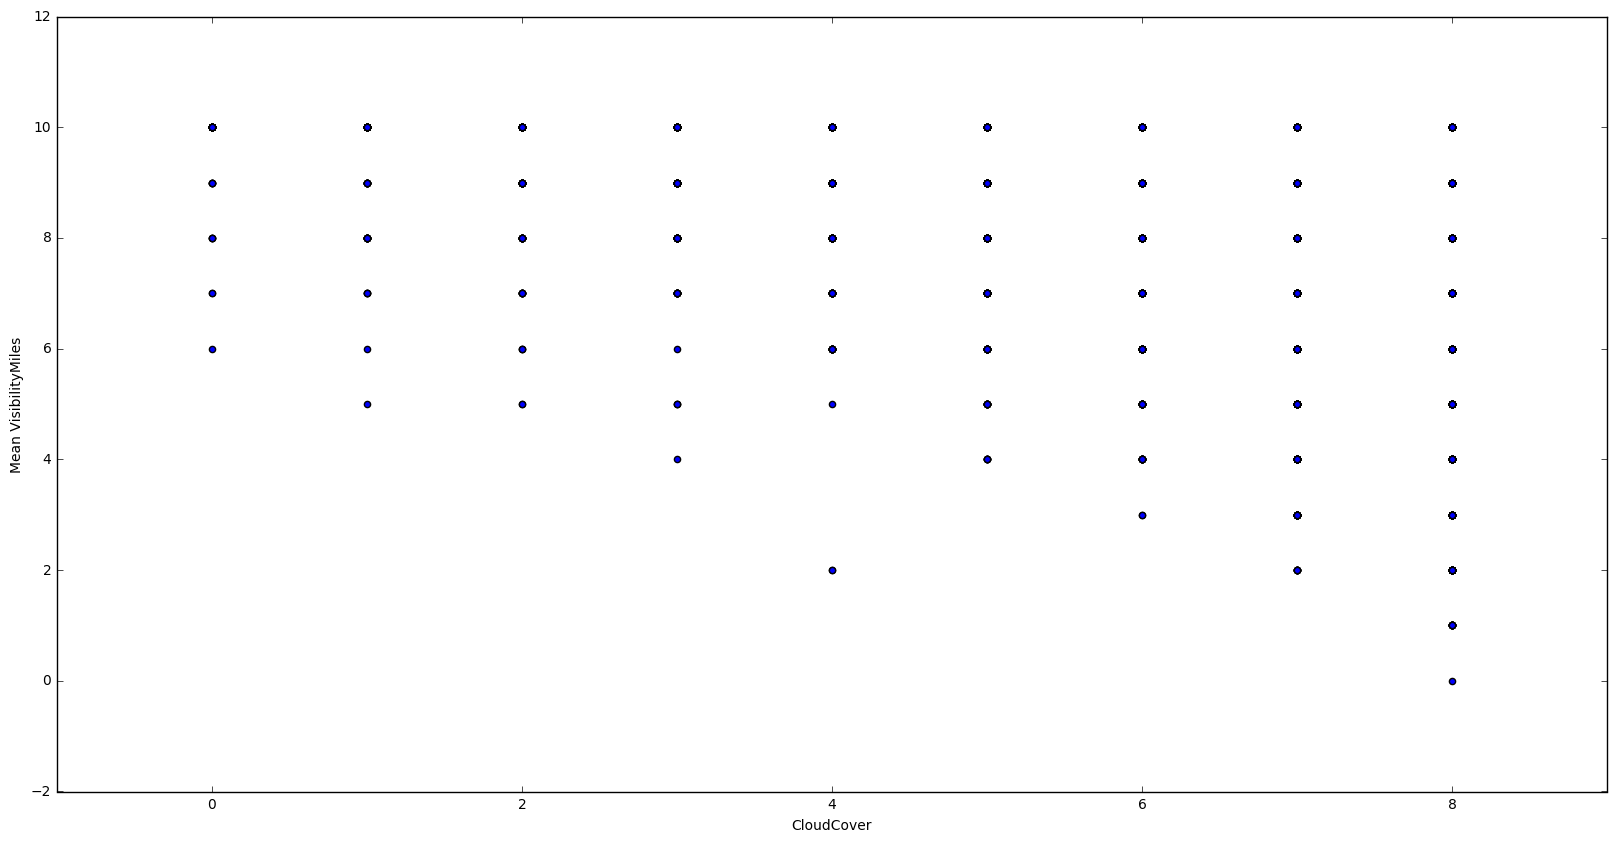

In [12]:
weather.plot.scatter( x = 'CloudCover', y = 'Mean VisibilityMiles')

As one would expect the less cloud cover the greater visibility. 

How about temperature and wind speed?

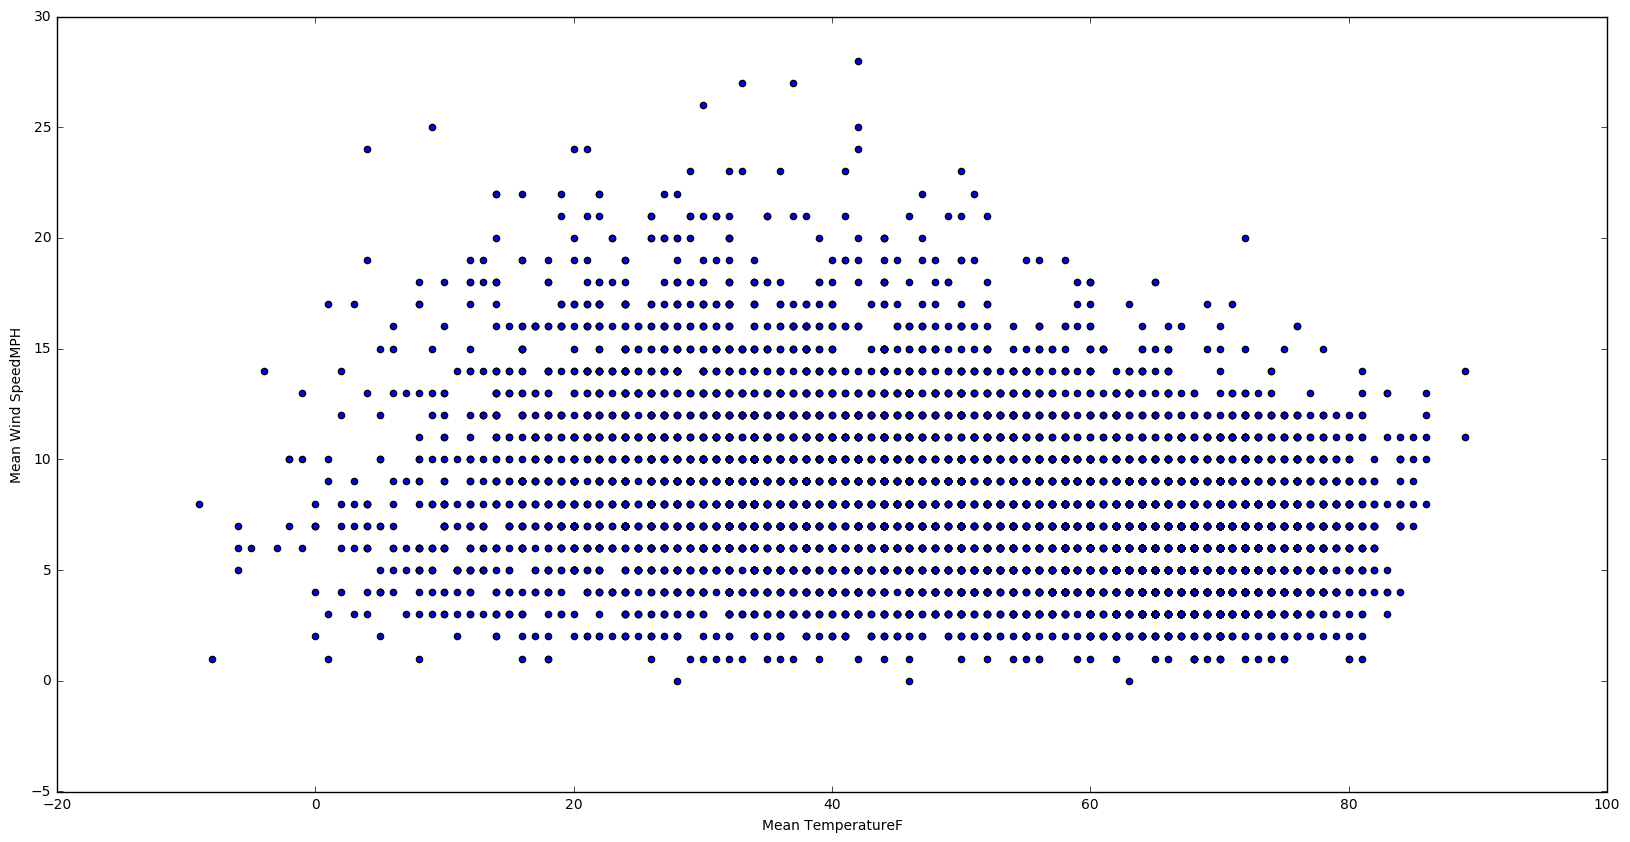

In [13]:
weather.plot.scatter( x = 'Mean TemperatureF', y = 'Mean Wind SpeedMPH')

not much of an insight there, but...

when you look at the relationship on days where it thunders:

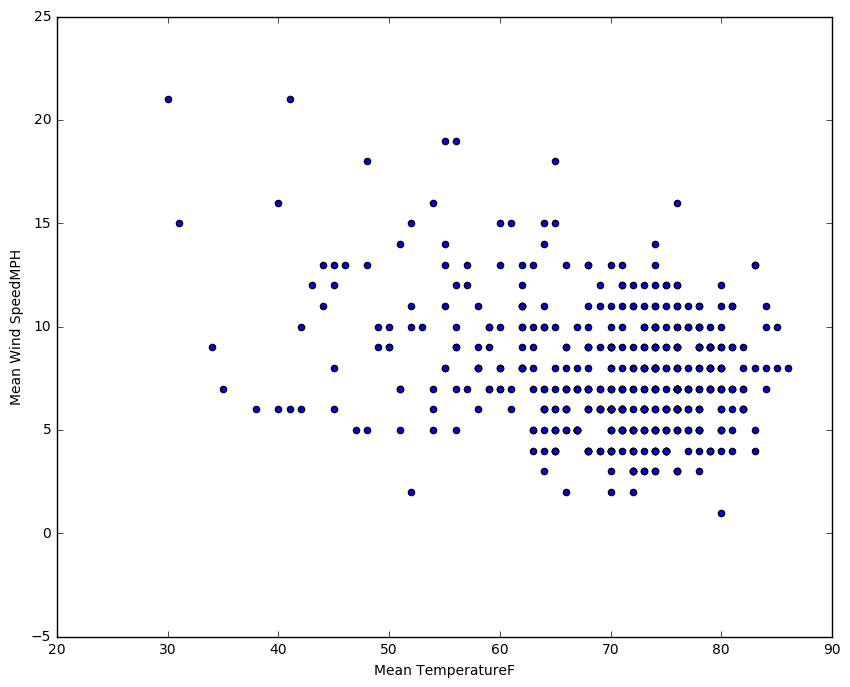

In [12]:
thunder.plot.scatter( x = 'Mean TemperatureF', y = 'Mean Wind SpeedMPH')

We see that it doesn't really thunder when its cold out!

This plot it interesting. It shows when the temperature is cold, the wind isn't coming out of the south. Make sense for Syracuse.

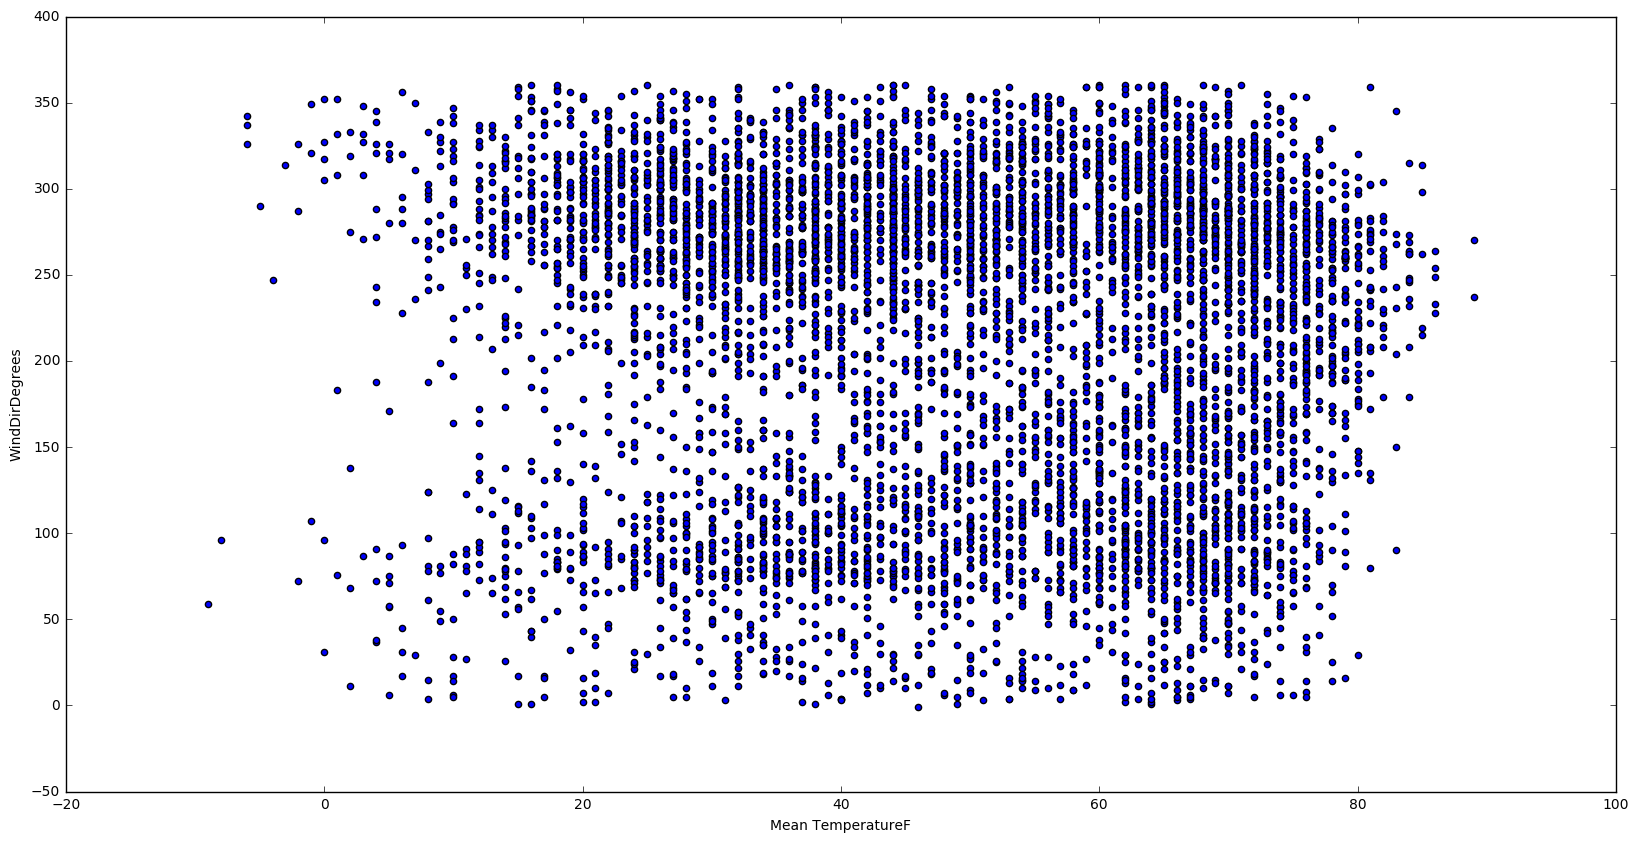

In [14]:
weather.plot.scatter( x = 'Mean TemperatureF', y = 'WindDirDegrees') 

In [15]:
weather['Events'].unique()

array(['Snow', 'Fog-Rain-Snow', 'Fog-Rain', 'Rain', nan, 'Rain-Snow',
       'Fog-Snow', 'Rain-Thunderstorm', 'Fog-Rain-Thunderstorm',
       'Thunderstorm', 'Fog', 'Fog-Rain-Snow-Thunderstorm',
       'Rain-Snow-Thunderstorm', 'Fog-Snow-Thunderstorm',
       'Rain-Hail-Thunderstorm'], dtype=object)

In [19]:
weather['Events'] = weather.Events.fillna('None')

In [20]:
weather['Diff TemperatureF'] = weather['Max TemperatureF'] - weather['Min TemperatureF']

In [21]:
import matplotlib 
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0) # larger figure size

In [22]:
weather['date'] = pd.to_datetime(weather.EST) # make timeseries data

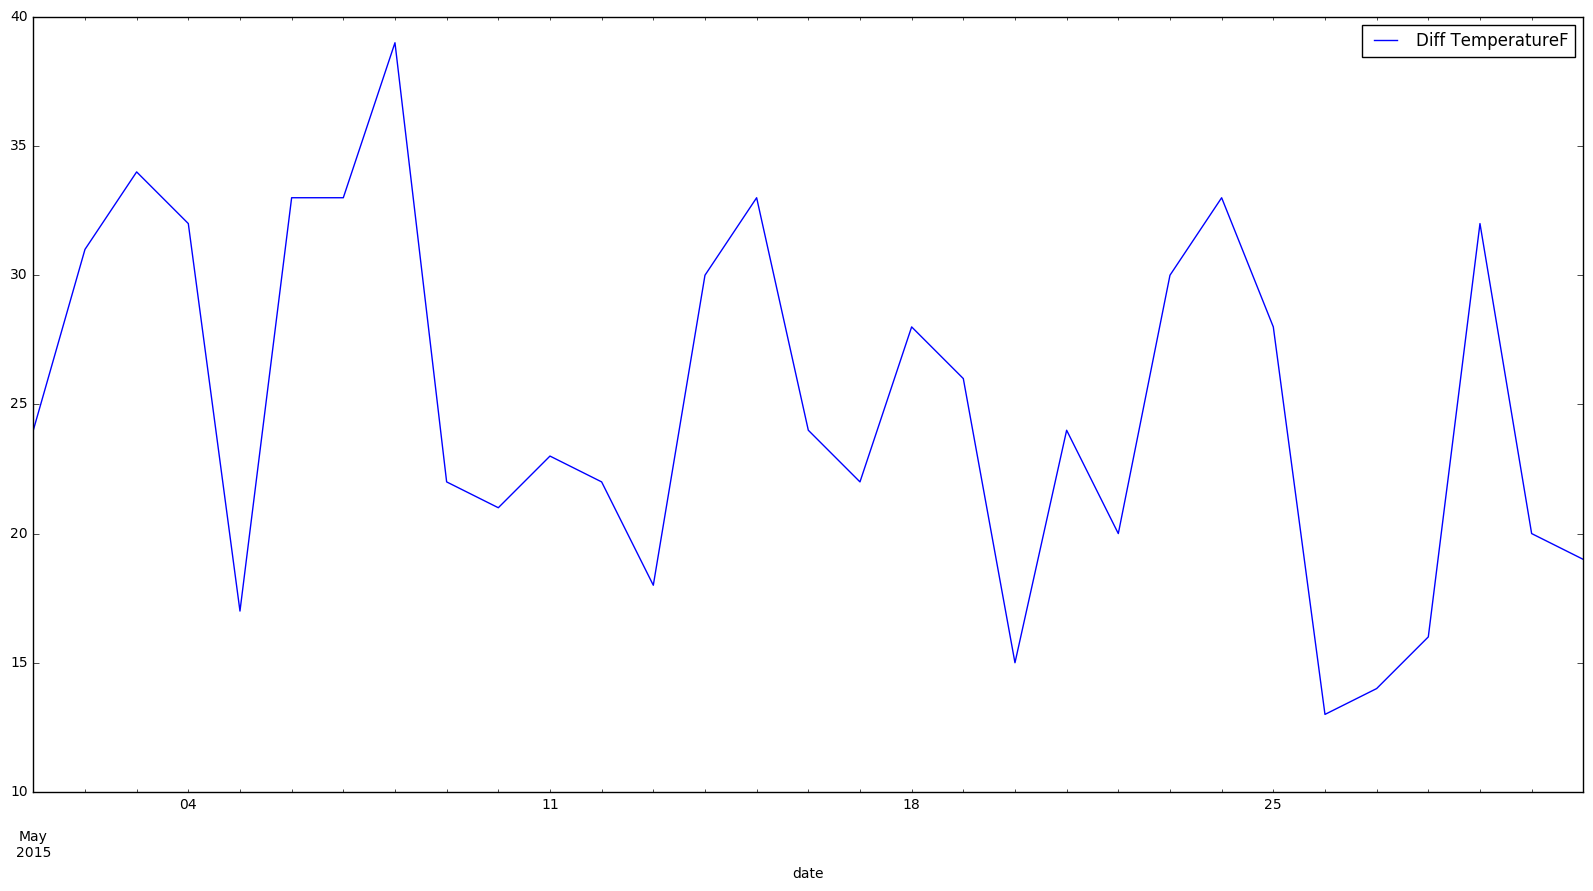

In [23]:
# let's plot the temperature swings For may 2015
weather[weather['EST'].str.find("2015-5") >=0 ].plot.line( x = 'date', y = 'Diff TemperatureF')

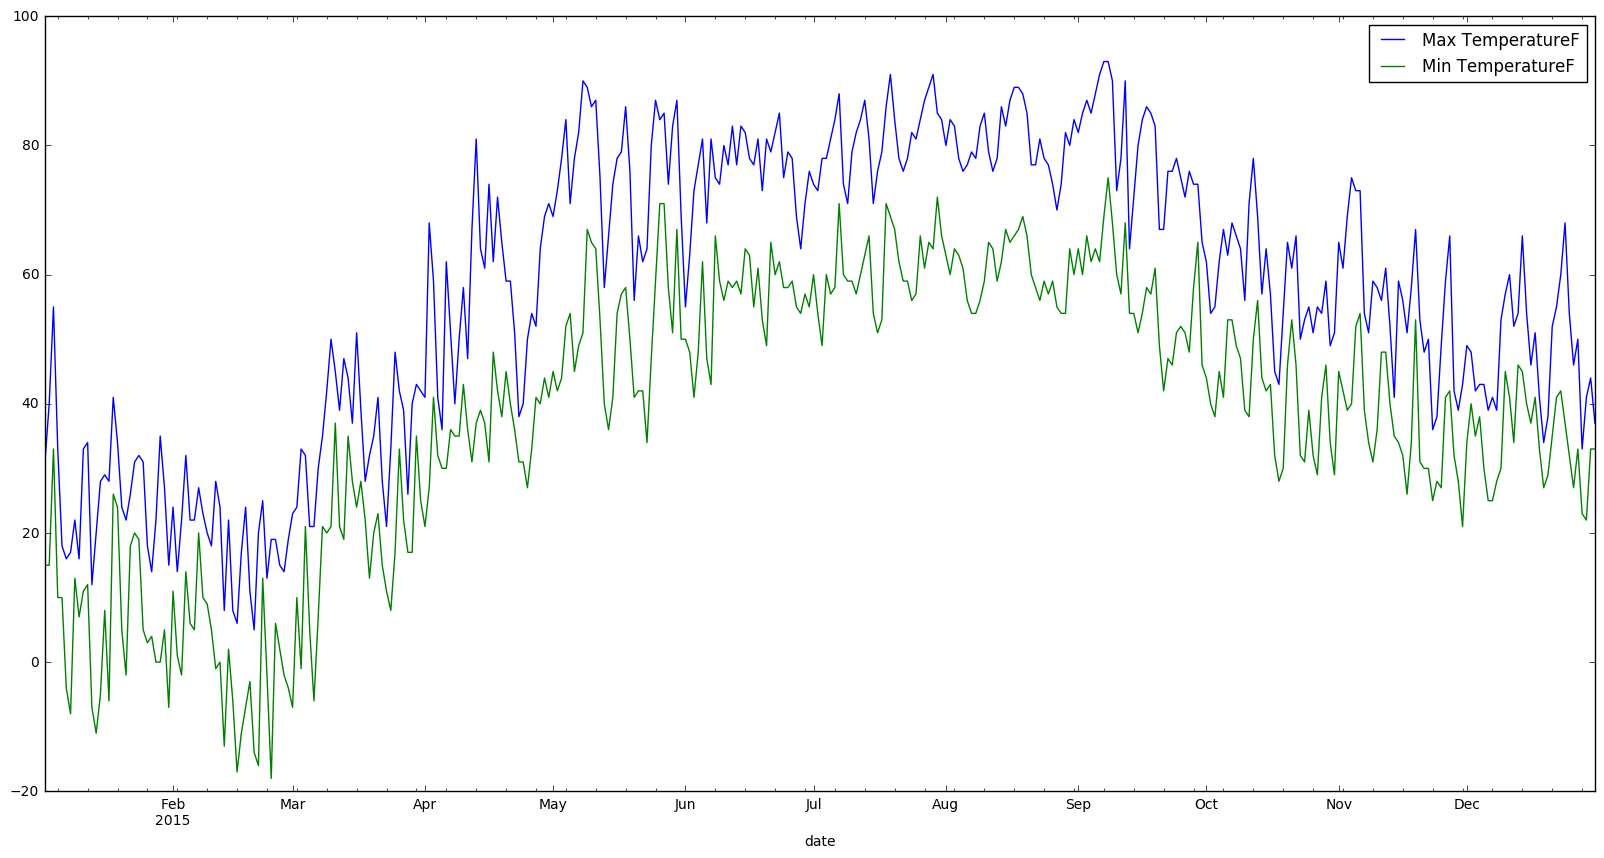

In [24]:
w2015 = weather[ weather.date > '2015-01-01']
w2015.plot.line(x = 'date', y =['Max TemperatureF', 'Min TemperatureF'] )